In [5]:
import napari
import zarr
import dask.array as da
from PIL import Image
from pathlib import Path
from dask.diagnostics import ProgressBar
import numpy as np
import matplotlib.pyplot as plt

In [6]:
path_to_ome_zarr = r'/media/brandon/Data1/Brandon/fly_immune/Lightsheet_Z1/2022_02_24_uas-mcd8-gfp_r4-gal4_x_dipt_dtom2/ecoli_hs_gfp/larvae_4/crop.ome.zarr'
channel_axis = 1
scale = [1, 2, 0.3295, 0.3295]

In [7]:
viewer = napari.Viewer()
viewer.open(path_to_ome_zarr, channel_axis=channel_axis)
for layer in viewer.layers:
    layer.scale = scale

In [3]:
def get_mips(dask_array, channel):
    this_data = dask_array[:, channel, :]
    mip = da.max(this_data, axis=1)
    
    return mip.compute()
    
    
    

In [4]:
# save mips to tiff using PIL
mip_dir = str(Path(path_to_ome_zarr).parent / "mips")

res = '/0'
data = da.from_zarr(path_to_ome_zarr + res)

# green
with ProgressBar():
    green_mip = get_mips(data, channel=0)
    
for i in range(green_mip.shape[0]):
    this_green_mip = green_mip[i]
    Image.fromarray(this_green_mip).save(mip_dir + '/mip_green' + '_' + str(i) + '.tif')

# red
with ProgressBar():
    red_mip = get_mips(data, channel=1)

for i in range(green_mip.shape[0]):
    this_red_mip = red_mip[i]
    Image.fromarray(this_red_mip).save(mip_dir + '/mip_red' + '_' + str(i) + '.tif')


[########################################] | 100% Completed |  8min 17.7s
[########################################] | 100% Completed |  9min 20.7s


In [6]:
# save mips to tiff using PIL
mip_dir = str(Path(path_to_ome_zarr).parent / "mips")

for i in range(green_mip.shape[0]):
    this_green_mip = green_mip[i]
    Image.fromarray(this_green_mip).save(mip_dir + '/mip_green' + '_' + str(i) + '.tif')
    this_red_mip = red_mip[i]
    Image.fromarray(this_red_mip).save(mip_dir + '/mip_red' + '_' + str(i) + '.tif')


In [20]:
mip_dir = str(Path(path_to_ome_zarr).parent / "mips")
mip_dir

'/media/brandon/Data1/Brandon/fly_immune/Serenity/2022_09_20_2022_dpt-gfp_ecoli-hs-dtom_timeseries/larvae_1/mips'

In [40]:
green_mip.shape

(24, 7376, 5568)

In [44]:
red_mip.shape

()

crude gfp quantification

In [9]:
thresh = 381
green_means = np.zeros(len(green_mip))
for t in range(len(green_mip)):
    print(t)
    this_mip = green_mip[t]
    green_means[t] = np.mean(this_mip[this_mip > thresh])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


Text(0, 0.5, 'mean gfp signal (a.u.)')

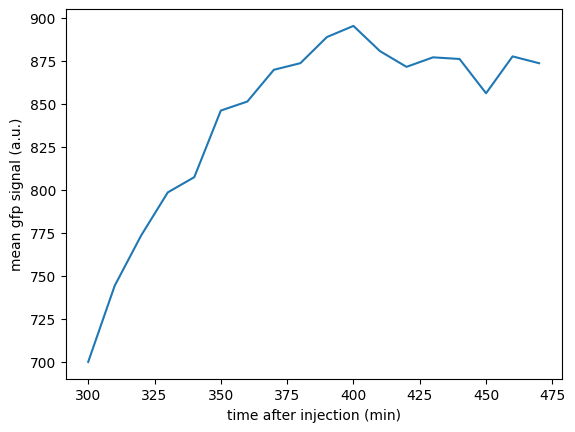

In [13]:
tvec = np.arange(5 * 60, 8 * 60, 10)
plt.plot(tvec, green_means)
plt.xlabel('time after injection (min)')
plt.ylabel('mean gfp signal (a.u.)')